In [8]:
from IPython.display import clear_output
!git clone https://github.com/jroakes/querycat.git
!pip install -r querycat/requirements_colab.txt

clear_output()
print('All loaded.')

All loaded.


In [138]:
import querycat
import searchconsole
import numpy as np
import pandas as pd
account = searchconsole.authenticate(client_config='client_secrets.json',
                                     credentials='credentials.json')
webproperty = account['https://www.maytronics.com/']
report = webproperty.query.range('today',days=-30).dimension('date','query','page','country').get().to_dataframe()
#print(report.rows)

In [146]:
#report=report[report['position'] <= 30]  
report['diff'] = 1


C:\Users\rot\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
catz = querycat.Categorize(report, 'query', min_support=10,  alg='apriori')
catz.counts.head(20)

Converting to transactions.


C:\Users\rot\ContentToolset\querycat\lib\categorize.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[[col]]     = df[col].astype(str).dropna()
C:\Users\rot\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Normalizing the keyword corpus.
Total queries: 132161
Total unique queries: 3351
Total transactions: 3350
Running Apriori
Making Categories
Total Categories: 492


C:\Users\rot\ContentToolset\querycat\lib\categorize.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df['match_queries'] = match_queries
C:\Users\rot\ContentToolset\querycat\lib\categorize.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df['category'] = self.df.match_queries.map(lambda x:  self.match_labels(x, self.categories))


,category
maytronics,14642
cleaner pool dolphin,10217
dolphin,6745
robot,4917
cleaner pool,4325
pool robot,4153
##other##,3831
pool,3503
cleaner pool robotic,3389
cleaner pool dolphin robotic,3317


In [142]:
labels = ['1 to 3', '3 to 5', '5 to 9', '9 to 30']
report['position_bins'] = pd.qcut(report['position'], q=4,labels=labels)

C:\Users\rot\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [143]:
report

,date,query,page,country,clicks,impressions,ctr,position,match_queries,category,position_bins
0,2021-08-19,dolphin pool cleaner,https://www.maytronics.com/residential-pools-en,usa,13,489,0.026585,7.885481,cleaner dolphin pool,cleaner pool dolphin,5 to 9
1,2021-08-14,dolphin pool cleaner,https://www.maytronics.com/residential-pools-en,usa,11,570,0.019298,7.836842,cleaner dolphin pool,cleaner pool dolphin,5 to 9
2,2021-08-14,maytronics,https://www.maytronics.com/the-dolphin-differe...,usa,11,118,0.093220,2.483051,maytronics,maytronics,3 to 5
3,2021-08-18,maytronics,https://www.maytronics.com/,isr,11,42,0.261905,2.404762,maytronics,maytronics,3 to 5
4,2021-08-21,dolphin pool cleaner,https://www.maytronics.com/residential-pools-en,usa,11,522,0.021073,7.885057,cleaner dolphin pool,cleaner pool dolphin,5 to 9
5,2021-08-15,maytronics,https://www.maytronics.com/,isr,9,32,0.281250,3.812500,maytronics,maytronics,3 to 5
6,2021-08-10,dolphin s200,https://www.maytronics.com/residential-pools-e...,usa,8,49,0.163265,2.224490,dolphin s200,s200 dolphin,3 to 5
7,2021-08-15,dolphin pool cleaner,https://www.maytronics.com/residential-pools-en,usa,8,546,0.014652,7.794872,cleaner dolphin pool,cleaner pool dolphin,5 to 9
8,2021-08-11,dolphin pool cleaner,https://www.maytronics.com/residential-pools-en,usa,7,562,0.012456,8.540925,cleaner dolphin pool,cleaner pool dolphin,5 to 9
9,2021-08-12,dolphin s200,https://www.maytronics.com/residential-pools-e...,usa,7,41,0.170732,2.268293,dolphin s200,s200 dolphin,3 to 5


In [144]:
bsim = querycat.BERTSim()

In [147]:
bsim.read_df(report, term_col = 'category', diff_col = 'diff')

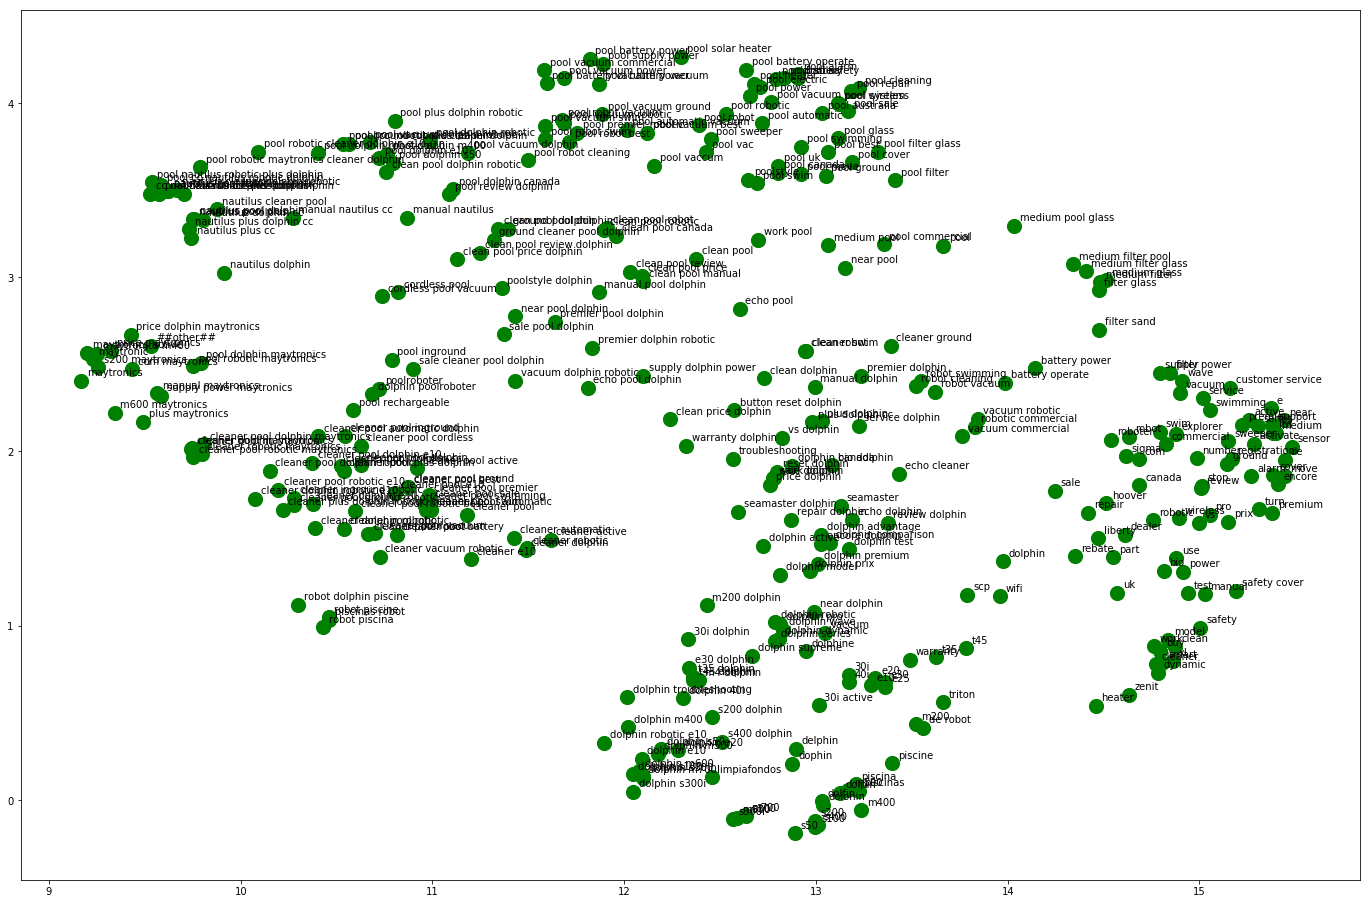

In [148]:
bsim.diff_plot(reduction='umap')

In [149]:
data = {'category': bsim.terms,'embedding_1': bsim.embeddings_2d[:,0], 'embedding_2':bsim.embeddings_2d[:,1]}
embeddings_df=pd.DataFrame(data=data)

In [159]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(bsim.embeddings_2d)
    wcss.append(kmeans.inertia_)

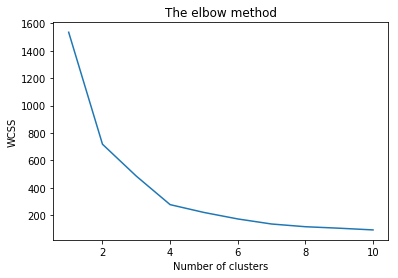

In [160]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [162]:
n_clusters=input('insert number of topics   ')
print('')
print('')
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = int(n_clusters), init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(bsim.embeddings_2d)
y_kmeans_to_merge=pd.DataFrame(y_kmeans).rename(columns={0:"topic"})



insert number of topics   4




In [168]:
embeddings_df=embeddings_df.join(y_kmeans_to_merge)

In [179]:
embeddings_df.drop(columns=['embedding_1','embedding_2'],inplace=True)

In [181]:
report_export= report.merge(embeddings_df, on='category',how='outer')


### Navigational
Brand, product name, previous touch-point (existing exposure) 

### Informational
info, more information, information, details, accessories, details, features, benefits

### Commercial Investigation
small, medium, large, kids, mens, womens, black, blue, gray, orange, pink, red, green, purple, versus, vs, best, price, pricing, reviews, deals
### Transactional
buy, purchase, sale, coupon, discount


In [184]:
navigational_words=['maytronics','dolphin','wave']
inforamtional_words=['why','what','how']
commercial_words=['small','medium','large','versus','vs','best','price','pricing','reviews','deals']
transacional_words=['buy','purchase','sale','coupon','discount']

mydict = {'maytronics' : 'navigational',
            'dolphin' : 'navigational',
            'wave' : 'navigational',
            'what' : 'informational',
            'why ': 'informational',
            'how': 'informational',
            'info': 'informational', 
            'more information': 'informational', 
            'information': 'informational', 
            'details': 'informational', 
            'accessories': 'informational', 
            'details': 'informational', 
            'features': 'informational', 
            'benefits': 'informational',
            'small': 'comercial', 
            'medium': 'comercial', 
            'large': 'comercial', 
            'kids': 'comercial', 
            'mens': 'comercial', 
            'womens': 'comercial', 
            'black': 'comercial', 
            'blue': 'comercial', 
            'gray': 'comercial', 
            'orange': 'comercial', 
            'pink': 'comercial', 
            'red': 'comercial', 
            'green': 'comercial', 
            'purple': 'comercial', 
            'versus': 'comercial', 
            'vs': 'comercial', 
            'best': 'comercial', 
            'price': 'comercial',
            'cost': 'comercial',
            'pricing': 'comercial', 
            'reviews': 'comercial', 
            'deals': 'comercial',         
            'buy': 'transactional',
            'purchase': 'transactional',
            'sale': 'transactional',
            'coupon': 'transactional',
            'discount': 'transactional'}

pat = '|'.join(r"\b{}\b".format(x) for x in mydict.keys())
report_export['intent'] = report_export['query'].str.extract('('+ pat + ')', expand=False).map(mydict)

In [186]:
report_export.drop(columns=['diff'],inplace=True)

In [188]:
report_export.to_csv('report_export.csv')